In [ ]:
1. 선형회귀 예제
출처: http://hleecaster.com/ml-linear-regression-example/

sklearn, 데이터를 불러올 때 필요한 pandas, 배열을 바꿀 때 필요한 numpy, 시각화를 위한 matplotlib를 임포트한다

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

키와 몸무게 데이터를 준비한다

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = pd.read_csv('/content/drive/My Drive/height.csv')
file.head(10)

,height,weight
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
5,68.70,123.30
6,69.80,141.49
7,70.01,136.46
8,67.90,112.37
9,66.78,120.67


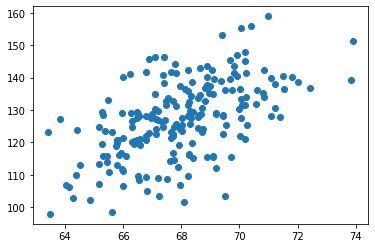

In [ ]:
x= file["height"]
y= file["weight"]
plt.plot(x, y, 'o')
plt.show()

모델을 생성하고 데이터를 fit 시킨다
(주의: X데이터를 넣을 때 .values.reshape(-1,1)를 해줌. 왜냐하면 X는 2차원 array 형태여야 하기 때문)

In [ ]:
model = LinearRegression()
model.fit(x.values.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

키가 70인 사람의 몸무게를 예측한다

In [ ]:
model.predict([[70]])

array([134.2596226])

coef_: 기울기

intercept_: 절편

In [ ]:
model.coef_

array([3.43267613])

In [ ]:
model.intercept_

-106.02770644878137

기존 X 값으로 y를 예측하게 해서 그래프를 그려보면 선이 나온다

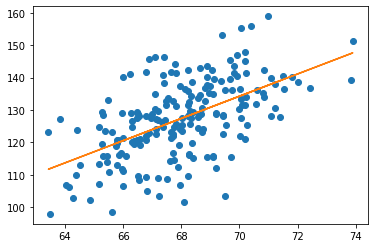

In [ ]:
plt.plot(x, y, 'o')
plt.plot(x,model.predict(x.values.reshape(-1,1)))
plt.show()

2. 다중선형회귀 예제

출처: http://hleecaster.com/ml-multiple-linear-regression-example/

rent(=임대료)항목을 예측하기위해 14개의 정보를 사용한다

In [ ]:
file2 = pd.read_csv('/content/drive/My Drive/manhattan.csv')
file2.head(10)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
5,10817,3800,3.0,2,1100,3,5.0,101,0,0,0,0,0,0,0,0,Central Harlem,Manhattan
6,9077,1995,0.0,0,600,6,1.0,115,0,0,0,0,0,0,0,0,Midtown East,Manhattan
7,5150,2995,0.0,1,579,6,21.0,33,0,0,0,0,0,0,0,0,Battery Park City,Manhattan
8,9507,15000,2.0,2,1715,0,30.0,2,0,0,0,0,0,0,0,0,Flatiron,Manhattan
9,1437,4650,1.0,1,915,5,5.0,106,0,0,0,0,0,0,0,0,Upper East Side,Manhattan


학습데이터와 테스트데이터로 분리한다

모든 데이터에 임대료 정답이 있으므로 테스트데이터를 예측모델에 넣어서 정답을 잘 맞추는지 보기위함이다

In [ ]:
from sklearn.model_selection import train_test_split

x = file2[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = file2[['rent']]

x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.8,test_size=0.2)

학습데이터를 통해 모델을 생성한다

In [ ]:
from sklearn.linear_model import LinearRegression

model2= LinearRegression()
model2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

임의로 14개의 항목값을 넣어주면 임대료를 예측해준다

In [ ]:
my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
my_predict = model2.predict(my_apartment)

x_test를 넣어 예측한 y 값들을 y_predict라고 저장한다

In [ ]:
y_predict= model2.predict(x_test)

x축은 실제 임대료, y축은 예측한 임대료로 시각화한다

임대료가 낮은 항목은 꽤 비슷하게 맞추지만 높은 임대료에서는 오차가 좀 발생하는 것을 볼 수 있다

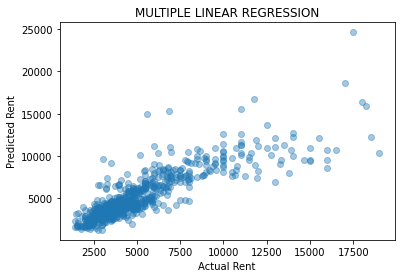

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

회귀계수와 상수 값을 확인한다
14개의 변수를 사용했으므로 회귀계수도 14개가 존재한다

In [ ]:
print(model2.coef_)

[[-347.48941179 1111.17577932    5.14457599  -17.04847495   23.49407732
    -7.28886941 -114.93040336   74.39147508  212.26438254 -147.10682941
    44.54250695  -44.92448152 -101.1268856     1.62970908]]


In [ ]:
print(model2.intercept_)

[-501.28427122]


어떤 변수가 임대료와 연관이 있는지 위해 scatter플롯을 그려본다

면적과 지어진 시기를 보면 면적은 임대료와 관계가 있고 얼마나 오래되었는지는 별로 영향이 없음을 알 수 있다

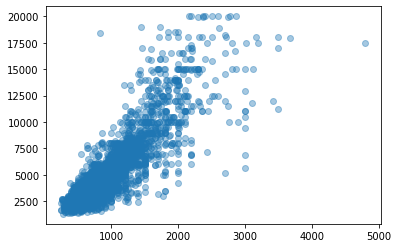

In [ ]:
# 주택의 면적 'size_sqft'과 가격 'rent'
plt.scatter(file2[['size_sqft']], file2[['rent']], alpha=0.4)
plt.show()

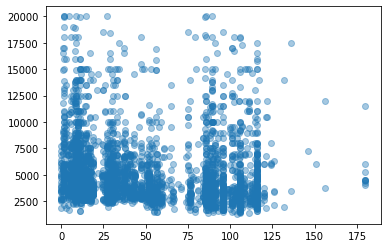

In [ ]:
# 주택이 얼마나 오래 전에 지어졌는지 'building_age_yrs'와 가격 'rent'
plt.scatter(file2[['building_age_yrs']], file2[['rent']], alpha=0.4)
plt.show()

모델의 정확도를 평가하기 위해 테스트데이터를 사용한다
다중선형회귀 모델의 정확도 평가에는 잔차분석을 사용한다
(잔차: 실제 y값- 예측된 y값의 차이)

.score() 메소드는 R²라고 하는 결정계수를 반환하는데, 이 값이 클수록 실제값과 예측값이 유사한 것이다- 일반적으로 0.7정도면 양호하다고 간주한다

예를 들어, 주택 사이즈(“size_sqft”)와 침실 개수(“bedrooms”)를 기준으로 임대료를 예측하는 모델의 R²이 0.72인 경우 그 2개의 변수들이 함께 임대료 변동의 72%를 설명한다는 뜻이다.


In [ ]:
print(model2.score(x_train, y_train))

0.7904291745732794


이 결과는 임대료의 79%를 위의 14개의 항목으로 설명할 수 있다는 의미이다

3. 로지스틱 회귀 예제

출처: http://hleecaster.com/ml-logistic-regression-example/

In [ ]:
file3 = pd.read_csv('/content/drive/My Drive/Titanic Passengers.csv')
print(file3.shape)
print(file3.head())

(1309, 14)
   pclass  survived  ...   body                         homedest
0       1         1  ...    NaN                     St Louis, MO
1       1         1  ...    NaN  Montreal, PQ / Chesterville, ON
2       1         0  ...    NaN  Montreal, PQ / Chesterville, ON
3       1         0  ...  135.0  Montreal, PQ / Chesterville, ON
4       1         0  ...    NaN  Montreal, PQ / Chesterville, ON

[5 rows x 14 columns]


데이터 전처리하기

pclass, sex, age가 생존여부에 영향을 미쳤을것이라 가설을 세우고, 문자열 데이터를 숫자로 변환해준다

In [ ]:
file3['sex'] = file3['sex'].map({'female':1,'male':0})

결측치 채워주기

데이터에 age값이 비어있는 경우가 있는데 이를 평균값으로 대체하여 넣어준다

In [ ]:
file3['age'].fillna(value= file3['age'].mean(), inplace=True)

feature 분리하기

pclass 항목의 1등석/2등석 탑승정보를 각각의 feature로 만들기 위해 컬럼을 새로 생성한다

In [ ]:
file3['firstclass']= file3['pclass'].apply(lambda x: 1 if x== 1 else 0)
file3['secondclass']= file3['pclass'].apply(lambda x: 1 if x== 2 else 0)

데이터 셋 준비 완료

In [ ]:
features = file3[['sex', 'age', 'firstclass', 'secondclass']]
survival = file3['survived']

train set과 test set을 분리한다

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, survival)

데이터 정규화(=스케일링) 하기

sklearn이 제공하는 StandardScaler를 활용한다

StandardScaler는 평균 0, 표준편차 1로 변환하는 방법이지만 이외에도 최소값 0, 최대값 1이 되도록 변환하는 MinMaxScaler, 중앙값(median) 0, IQR(interquartile range) 1이 되도록 변환하는 RobustScaler 등이 있다

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_features= scaler.fit_transform(train_features)
test_features= scaler.transform(test_features)

모델을 생성하고 데이터를 넣어 fit 해준다

In [ ]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

train set으로 정확도를 출력한다

In [ ]:
print(model3.score(train_features, train_labels))

0.7961264016309888


test set으로 정확도를 출력한다

In [ ]:
print(model3.score(test_features, test_labels))

0.7591463414634146


각 feature들의 계수를 통해 생존여부에 영향을 미친 feature를 찾는다
순서대로 sex, age, firstclass, secondclass 이므로 성별과 일등석 탑승여부가 중요함을 알 수 있다
나이는 음수인데 이는 나이가 많을수록 생존확률이 감소한다는 것이다

In [ ]:
print(model3.coef_)

[[ 1.20318562 -0.4970323   0.91649353  0.36747777]]


In [ ]:
Jack = np.array([0.0, 20.0, 0.0, 0.0])
me= np.array([1.0, 25.0, 1.0, 0.0])
sample= np.array([Jack, me])
sample= scaler.transform(sample)
print(model3.predict(sample))
print(model3.predict_proba(sample))

[0 1]
[[0.86959206 0.13040794]
 [0.07258273 0.92741727]]
